In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score,root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')



In [18]:
fish = pd.read_csv("C:\\Users\\Sukhmeetkour\\OneDrive\\Documents\\Fish.csv")
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [19]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [20]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [21]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [22]:
fish.Species.value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
fish['Species'] = lab_enc.fit_transform(fish['Species'])
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [24]:
x = fish.drop("Weight",axis = 1)
y = fish['Weight']

In [25]:
x

,Species,Length1,Length2,Length3,Height,Width
0,0,23.2,25.4,30.0,11.5200,4.0200
1,0,24.0,26.3,31.2,12.4800,4.3056
2,0,23.9,26.5,31.1,12.3778,4.6961
3,0,26.3,29.0,33.5,12.7300,4.4555
4,0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,5,11.5,12.2,13.4,2.0904,1.3936
155,5,11.7,12.4,13.5,2.4300,1.2690
156,5,12.1,13.0,13.8,2.2770,1.2558
157,5,13.2,14.3,15.2,2.8728,2.0672


In [26]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [28]:
x_train.shape, y_train.shape

((111, 6), (111,))

In [29]:
x_test.shape, y_test.shape

((48, 6), (48,))

In [30]:
# model 1 multiple linear regression
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg1.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
y_pred_lin1 = lin_reg1.predict(x_test)
y_pred_lin1[:10]



array([ 523.07407281, -166.16851267,  170.50398778,  274.50646785,
        676.39604493,  316.68067766, 1222.714133  ,  652.14394133,
        797.79125634,  523.57725454])

In [32]:
r2_score(y_test,y_pred_lin1)

0.895512431185865

In [33]:
root_mean_squared_error(y_test,y_pred_lin1)

115.37034964411498

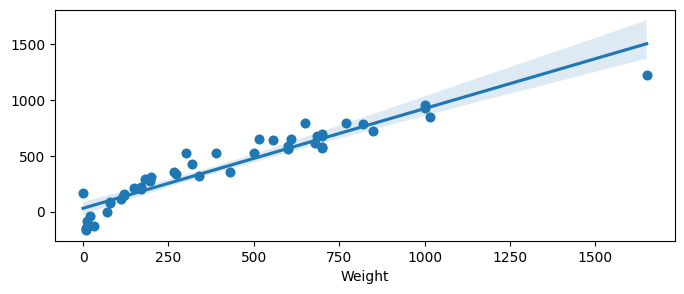

In [34]:
plt.figure(figsize=(8,3))
plt.scatter(y_test,y_pred_lin1)
#plt.plot(y_test,y_pred_lin1)
sns.regplot(x = y_test,y = y_pred_lin1)
plt.show()

#model building polynomial regression

In [35]:
X = fish.drop("Weight",axis = 1)
y = fish['Weight']

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly_feature = poly.fit_transform(x)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(poly_feature,
                                                 y,
                                                 test_size = 0.3)

In [42]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
y_pred_poly = lin_reg2.predict(x_test)
y_pred_poly[:10]

array([ -11.73225641, 1007.07180908,  -21.15338457,  124.62274536,
       1040.53041586,  145.07743444,  921.60488201,  971.80944326,
        427.6265352 ,  431.18597501])

In [44]:
r2_score(y_test,y_pred_poly)

0.9760748384685538

In [45]:
root_mean_squared_error(y_test,y_pred_poly)

53.43792304645377

<Axes: xlabel='Weight'>

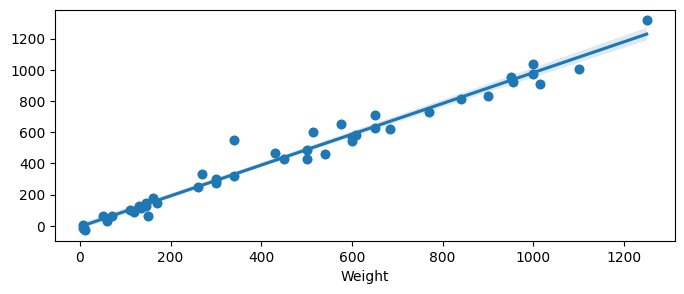

In [47]:
plt.figure(figsize=(8,3))
plt.scatter(y_test, y_pred_poly)
#plt.plot(y_test, y_pred_poly)
sns.regplot(x = y_test,y = y_pred_poly)
